# Part I-A

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Import CSV
Data_1A = pd.read_csv('/Users/shubham/Downloads/Data I-A.csv')

In [6]:
#Filtering 2016-17 row
Data_1A = Data_1A[Data_1A['Duration'] != '2016-17']

In [11]:
#Transforming Dataset into two dataframes:
#1)GDPs of states in different years
#2)%Growth of states in different years
GDP_States = np.split(Data_1A, [5], axis = 0)[0]
Growth_States = np.split(Data_1A, [5], axis = 0)[1]
Growth_States.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [10]:
#Making a new dataframe to have clear visulaization of what is needed to plot
#For data: Taking mean of the duration 2013-14, 2014-15 and 2015-16 as per the question
Data_Plot = pd.DataFrame(data=Growth_States.iloc[1:,:].mean(), index=Growth_States.columns, columns= ['Average Growth Rate'])
Data_Plot.head(10)

,Average Growth Rate
Items Description,NaN
Duration,NaN
Andhra Pradesh,14.033333
Arunachal Pradesh,14.413333
Assam,12.650000
Bihar,13.603333
Chhattisgarh,13.703333
Goa,6.033333
Gujarat,11.126667
Haryana,11.846667


In [12]:
#Sorting data for a better top and bottom states' visualisation
Data_Plot.sort_values(by='Average Growth Rate', inplace=True)
Data_Plot.head(10)

,Average Growth Rate
Goa,6.033333
Meghalaya,6.953333
Odisha,9.836667
Sikkim,10.486667
Jammu & Kashmir,10.900000
Gujarat,11.126667
Punjab,11.185000
All_India GDP,11.203333
Maharashtra,11.260000
Rajasthan,11.320000


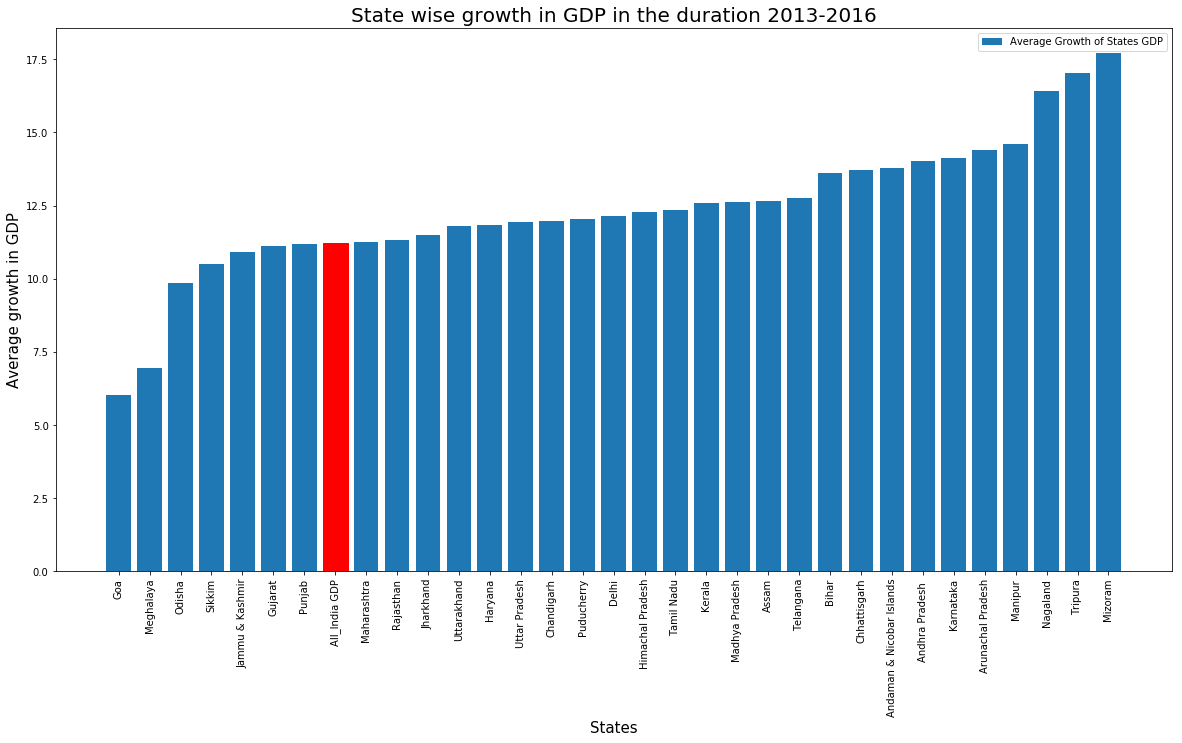

In [168]:
#Plotting Data
xpos = np.arange(len(Data_Plot[:-3]))#Indexing to skip 'Items Description' and 'Duration' rows
plt.subplots(figsize=(20,10))
F_plot = plt.bar(xpos, Data_Plot['Average Growth Rate'][:-3], label = 'Average Growth of States GDP')
F_plot[7].set_color('r') #Making All_India GDP 'Red' to have a visualization of states above and below the average growth.
plt.xticks(xpos,Data_Plot.index[:-3],rotation ='vertical', fontsize=10)
plt.ylabel("Average growth in GDP", fontsize = 15)
plt.xlabel("States", fontsize = 15)
plt.title('State wise growth in GDP in the duration 2013-2016', fontsize=20)
plt.legend()

We can clearly see the states like Mizoram, Tripura, Nagaland, Manipur, Karnataka are consistently growing whereas states like Meghalaya, Odisha, Sikkim, J&K have been struggling, their average growth in GDP is lower than growth of All_India GDP.

In [17]:
#Checking home state's Average Growth and National Average Growth
print(Data_Plot[Data_Plot.index == 'Chhattisgarh'])
print(Data_Plot[Data_Plot.index == 'All_India GDP'])

              Average Growth Rate
Chhattisgarh            13.703333
               Average Growth Rate
All_India GDP            11.203333


So my home state i.e., Chhattisgarh's Average growth is higher than the National average grwoth rate by around 22.3%

In [19]:
#Getting the GDP of the states in the year 2015-16

GDP_2015_16_UNSORTED = GDP_States[-1:].transpose().rename(columns = {4 : 'GDPs'})
GDP_2015_16 = GDP_2015_16_UNSORTED[2:].sort_values(by='GDPs')
GDP_2015_16.head(10)

,GDPs
Sikkim,16637
Arunachal Pradesh,18784
Puducherry,26533
Meghalaya,26745
Chandigarh,30304
Goa,45002
Jammu & Kashmir,118387
Uttarakhand,184091
Assam,224234
Jharkhand,241955


Text(0.5, 1.0, 'State wise GDP in year 2015-16')

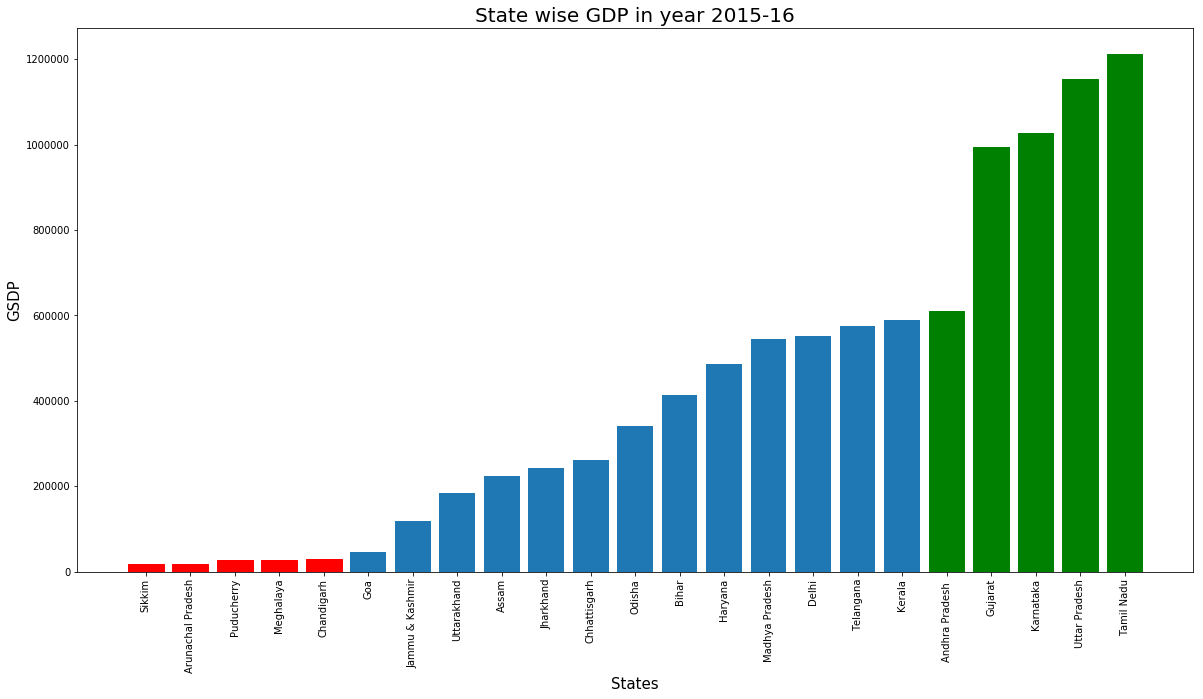

In [172]:
xpos1 = np.arange(len(GDP_2015_16[:-11]))#We can ignore the NaN for our plot, Selecting Datas till Tamil Nadu 
#as we don't need All_India GDP for our required conclusion
plt.subplots(figsize=(20,10))
F_plot1 = plt.bar(xpos1, GDP_2015_16['GDPs'][:-11], label = 'GDP in 2015-16')
for i in range(5):
    F_plot1[i].set_color('r')#Making bottom 5 red
    F_plot1[-i-1].set_color('g')#Making top 5 green
plt.xticks(xpos1,GDP_2015_16.index[:-11],rotation ='vertical', fontsize=10)
plt.ylabel("GSDP", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.title('State wise GDP in year 2015-16', fontsize = 20)

In the above plot, Top five states are plotted with green and bottom five are plotted with red

Top five States are:
1) Tamil Nadu
2) Uttar Pradesh
3) Karnataka
4) Gujarat
5) Andhra Pradesh

Bottom five states are:
1) Sikkim
2) Arunachal Pradesh
3) Puducherry
4) Meghalaya
5) Chandigarh

# Part I-B

In [21]:
#Importing Data manually (All States and UTs)
Gujrat = pd.read_csv('/Users/shubham/downloads/NAD-Gujarat-GSVA_cur_2015-16.csv')
Delhi = pd.read_csv('/Users/shubham/downloads/NAD-Delhi-GSVA_cur_2016-17.csv')
Goa = pd.read_csv('/Users/shubham/downloads/NAD-Goa-GSVA_cur_2015-16.csv')
HP = pd.read_csv('/Users/shubham/downloads/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
Chandigarh = pd.read_csv('/Users/shubham/downloads/NAD-Chandigarh-GSVA_cur_2015-16.csv')
Chhattisgarh = pd.read_csv('/Users/shubham/downloads/NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
Haryana = pd.read_csv('/Users/shubham/downloads/NAD-Haryana-GSVA_cur_2016-17.csv')
Sikkim = pd.read_csv('/Users/shubham/downloads/NAD-Sikkim-GSVA_cur_2015-16.csv')
AP = pd.read_csv('/Users/shubham/downloads/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
Bihar = pd.read_csv('/Users/shubham/downloads/NAD-Bihar-GSVA_cur_2015-16.csv')
Assam = pd.read_csv('/Users/shubham/downloads/NAD-Assam-GSVA_cur_2015-16.csv')
TN = pd.read_csv('/Users/shubham/downloads/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
Rajasthan = pd.read_csv('/Users/shubham/downloads/NAD-Rajasthan-GSVA_cur_2014-15.csv')
Arunachal = pd.read_csv('/Users/shubham/downloads/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
Telangana = pd.read_csv('/Users/shubham/downloads/NAD-Telangana-GSVA_cur_2016-17.csv')
Punjab = pd.read_csv('/Users/shubham/downloads/NAD-Punjab-GSVA_cur_2014-15.csv')
Puducherry = pd.read_csv('/Users/shubham/downloads/NAD-Puducherry-GSVA_cur_2016-17.csv')
Uttarakhand = pd.read_csv('/Users/shubham/downloads/NAD-Uttarakhand-GSVA_cur_2015-16.csv')
Tripura = pd.read_csv('/Users/shubham/downloads/NAD-Tripura-GSVA_cur_2014-15.csv')
Maharashtra = pd.read_csv('/Users/shubham/downloads/NAD-Maharashtra-GSVA_cur_2014-15.csv')
UP = pd.read_csv('/Users/shubham/downloads/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
MP = pd.read_csv('/Users/shubham/downloads/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
Nagaland = pd.read_csv('/Users/shubham/downloads/NAD-Nagaland-GSVA_cur_2014-15.csv')
Kerala = pd.read_csv('/Users/shubham/downloads/NAD-Kerala-GSVA_cur_2015-16.csv')
Karnataka = pd.read_csv('/Users/shubham/downloads/NAD-Karnataka-GSVA_cur_2015-16.csv')
Meghalaya = pd.read_csv('/Users/shubham/downloads/NAD-Meghalaya-GSVA_cur_2016-17.csv')
Mizoram = pd.read_csv('/Users/shubham/downloads/NAD-Mizoram-GSVA_const_2014-15.csv')
Meghalaya = pd.read_csv('/Users/shubham/downloads/NAD-Meghalaya-GSVA_cur_2016-17.csv')
Odisha =pd.read_csv('/Users/shubham/downloads/NAD-Odisha-GSVA_const_2016-17.csv')
Jharkhand = pd.read_csv('/Users/shubham/downloads/NAD-Jharkhand-GSVA_cur_2015-16.csv')
Manipur = pd.read_csv('/Users/shubham/downloads/NAD-Manipur-GSVA_cur_2014-15.csv', encoding='cp1252')
J_and_K = pd.read_csv('/Users/shubham/downloads/NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv')
A_and_N_Islands = pd.read_csv('/Users/shubham/downloads/NAD-Andaman_Nicobar_Islands-GSVA_cur_2014-15.csv')

In [43]:
#Making a list of all States' CSVs and a list of name of the states(strings)
#Not considering Delhi, Chandigarh, Andaman & Nicobar Islands,  Puducherry as they are Union Territories

liststates = [Gujrat, Goa, HP, Chhattisgarh, Haryana, Sikkim,AP,Bihar,Assam,TN,Rajasthan,Arunachal,Telangana,Punjab,Uttarakhand,Tripura,Maharashtra,UP,MP,Nagaland,Kerala,Karnataka,Meghalaya,Mizoram,Odisha,Jharkhand,Manipur,J_and_K]
listofstrings = ['Gujrat', 'Goa', 'HP', 'Chhattisgarh', 'Haryana', 'Sikkim','AP','Bihar','Assam','TN','Rajasthan','Arunachal','Telangana','Punjab','Uttarakhand','Tripura','Maharashtra','UP','MP','Nagaland','Kerala','Karnataka','Meghalaya','Mizoram','Odisha','Jharkhand','Manipur','J_and_K']

In [44]:
#Making a list a transposed dataframes of each states
transtates = []
for states in liststates:
    transtates.append(states.T[2:])

In [45]:
#Concating all the states in a single dataframe
DF = pd.concat(transtates)
DF.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
2011-12,1.07364e+07,7.95097e+06,1.85055e+06,611318,323584,1.85061e+06,1.2587e+07,1.56819e+07,2.19055e+06,4.46927e+06,...,3.48142e+06,1.91728e+06,2.02227e+06,2.02633e+07,5.51921e+07,7.70038e+06,1.33188e+06,6.15606e+07,609060,101075
2012-13,9.9171e+06,6.76774e+06,2.01144e+06,770303,367616,2.31573e+06,1.22328e+07,2.06926e+07,2.67926e+06,4.70296e+06,...,3.9694e+06,2.18497e+06,2.41918e+06,2.42079e+07,6.45155e+07,9.51574e+06,1.58176e+06,7.24495e+07,617130,117398
2013-14,1.30401e+07,9.55641e+06,2.31604e+06,715171,452499,2.02628e+06,1.50664e+07,2.19978e+07,2.89069e+06,5.35237e+06,...,4.56467e+06,2.37307e+06,2.73944e+06,2.68011e+07,7.21083e+07,1.03808e+07,1.72679e+06,8.07623e+07,625300,129158
2014-15,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263
2015-16,1.42338e+07,9.51635e+06,3.16427e+06,858369,694772,2.27601e+06,1.65098e+07,2.66408e+07,3.81236e+06,5.9681e+06,...,5.9162e+06,2.88792e+06,3.62825e+06,3.34455e+07,8.63766e+07,1.53179e+07,2.26293e+06,9.94316e+07,641990,154880


In [46]:
#Selecting index '2014-15' as per the question for further analysis
DF = DF[DF.index == '2014-15']

#For column names, taking the same from one of state's dataframe
colum = UP.Item
DF.columns =  colum

#Adding a new column for all the states
DF['States'] = listofstrings

#Assigning index 
forindex = np.arange(1,len(DF)+1)
DF.set_index(forindex, inplace=True)

In [49]:
DF.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States
1,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujrat
2,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793,Goa
3,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,553974,923164,4133326,9800853,895317,259291,10436879,70840,147330,HP
4,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860,Chhattisgarh
5,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana


In [50]:
#Selecting 'States' and 'Per Capita GSDP (Rs.)' and making new dataframe for analysing GPD per capita
#for all the states

DF_per_Capita = DF.iloc[:,-2:]
DF_per_Capita.head()

Item,Per Capita GSDP (Rs.),States
1,141263,Gujrat
2,271793,Goa
3,147330,HP
4,86860,Chhattisgarh
5,164077,Haryana


In [56]:
#Sorting with Per Capita GSDP

DF_per_Capita.sort_values(by='Per Capita GSDP (Rs.)', ascending=False, inplace=True)
DF_per_Capita.head()

Item,Per Capita GSDP (Rs.),States
2,271793,Goa
6,240274,Sikkim
5,164077,Haryana
21,154778,Kerala
15,153076,Uttarakhand


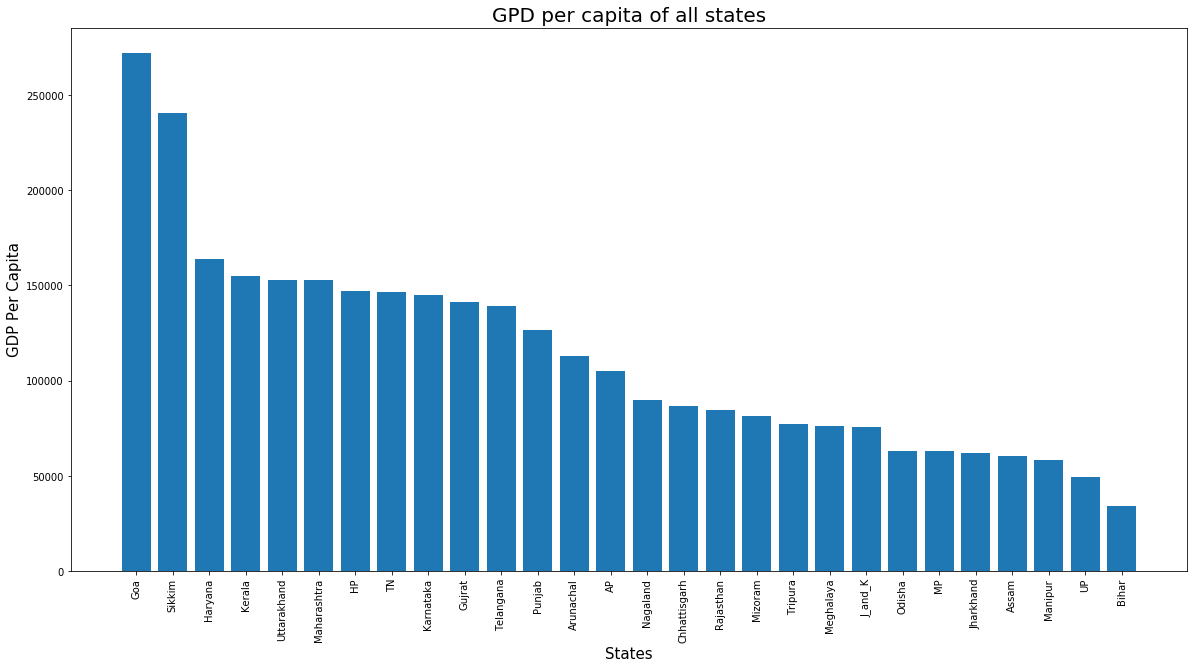

In [173]:
#Plotting GDP Per Capita for all the states
plt.subplots(figsize=(20,10))
xpos2 = np.arange(len(DF_per_Capita))
plt.bar(xpos2, DF_per_Capita['Per Capita GSDP (Rs.)'])
plt.xticks(xpos2, DF_per_Capita['States'], rotation = 'vertical', fontsize = 10)
plt.title('GPD per capita of all states', fontsize = 20)
plt.xlabel('States', fontsize=15)
plt.ylabel('GDP Per Capita', fontsize=15)

plt.figsize=(20,10)

The top 5 states having maximum GDP per capita are:
1) Goa
2) Sikkim
3) Haryana
4) Kerala
5) Uttarakhand

The bottom 5 states having minimum GDP per capita are:
1) Bihar
2) Uttar Pradesh
3) Manipur
4) Assam
5) Jharkhand



In [58]:
#Ratio of the highest per capita GDP to the lowest per capita GDP:

Ratio  = max(DF_per_Capita['Per Capita GSDP (Rs.)'])/min(DF_per_Capita['Per Capita GSDP (Rs.)'])
Ratio

8.004741709371503

# Plotting the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [71]:
#From DF, selecting 'Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product' and 'States' columns
#for further analysis.

DF_Contribution = DF.loc[:, ['Primary','Secondary','Tertiary','Gross State Domestic Product','States']]
DF_Contribution.head()

Item,Primary,Secondary,Tertiary,Gross State Domestic Product,States
1,1.58872e+07,3.30235e+07,3.02204e+07,8.95027e+07,Gujrat
2,312129,1547536,1738217,4063307,Goa
3,1548366,4119162,4133326,10436879,HP
4,6400817,8238886,7588778,23498180,Chhattisgarh
5,8.04042e+06,1.25614e+07,1.92266e+07,4.37462e+07,Haryana


In [72]:
#Creating respective columns for percentage contribution of the primary, secondary and tertiary sectors

DF_Contribution['% Primary'] = 100*(DF_Contribution['Primary'] / DF_Contribution['Gross State Domestic Product'])
DF_Contribution['% Secondary'] = 100*(DF_Contribution['Secondary'] / DF_Contribution['Gross State Domestic Product'])
DF_Contribution['% Tertiary'] = 100*(DF_Contribution['Tertiary'] / DF_Contribution['Gross State Domestic Product'])
DF_Contribution.sort_values(by=['Gross State Domestic Product'], inplace=True)

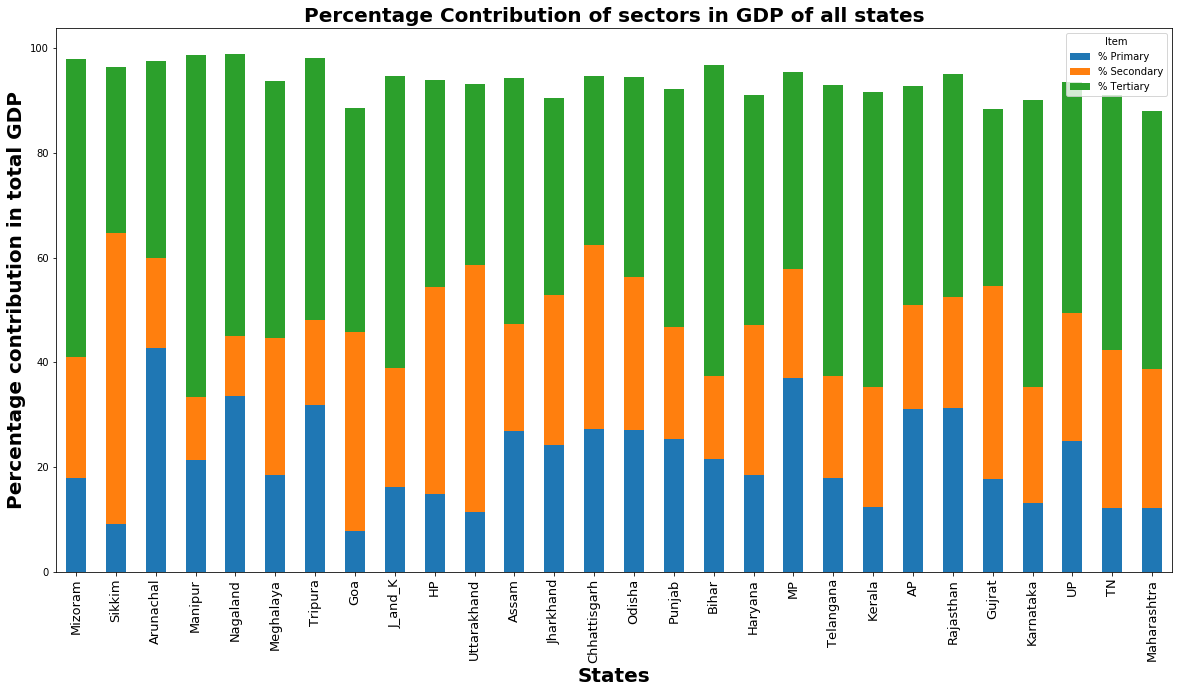

In [73]:
#Plotting the percentage contribution of the primary, secondary and tertiary sectors 
#as a percentage of the total GDP for all the states
#Using stacked bar plot for visualisation

x = DF_Contribution[['% Primary','% Secondary','% Tertiary']]
x.plot.bar(stacked=True, figsize=(20,10))
plt.title('Percentage Contribution of sectors in GDP of all states', fontsize = 20, fontweight='bold')
plt.xlabel('States', fontsize = 20, fontweight='bold')
plt.ylabel('Percentage contribution in total GDP',fontsize = 20, fontweight='bold' )
plt.xticks(np.arange(len(DF_Contribution)), DF_Contribution['States'], fontsize = 13)
plt.figsize=(20,10)

The above plot is in the increasing order of GSDP as we mover from Mizoram(Has the lowest GSDP) to Maharastra(Has the highest GDP).
In most of the states, percentage contribution in the GSDP is maximum by Tertiary sectors. While, states like Sikkim, Uttarakhand have Secondary sectors that contribute the most towards GSDP

# Categorising the states into four groups based on the GDP per capita (C1, C2, C3 and C4)

In [74]:
#From DF, filtering out the columns that are not required for further analysis

Categ_DF = DF.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products'])
Categ_DF.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States
1,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,2.40875e+07,3.40998e+06,5.52602e+06,1.01787e+07,...,57634,1.24252e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,8.95027e+07,633590,141263,Gujrat
2,308507,140421,30141,15744,122201,3622,1177608,204110,165819,380927,...,357,44028,233618,407099,346486,180431,4063307,14950,271793,Goa
3,1514981,853758,110304,540950,9968,33385,2543637,767268,808256,615496,...,129,194266,362521,1125937,553974,923164,10436879,70840,147330,HP
4,3948847,2613371,352208,597785,385483,2451970,4370593,1198438,2669855,1535571,...,16675,294552,739057,2462166,867982,1112232,23498180,270530,86860,Chhattisgarh
5,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,...,14459,479658,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,4.37462e+07,266620,164077,Haryana


In [75]:
#Finding quantiles from the column 'Per Capita GSDP (Rs.)' and assigning variables according to the value of q.

c_1 = Categ_DF['Per Capita GSDP (Rs.)'].quantile(q=1)
c_85 = Categ_DF['Per Capita GSDP (Rs.)'].quantile(q=0.85)
c_5 = Categ_DF['Per Capita GSDP (Rs.)'].quantile(q=0.5)
c_2 = Categ_DF['Per Capita GSDP (Rs.)'].quantile(q=0.2)

#Creating a new column to put categories of different states according to the quantile range
Categ_DF['Category'] = 'NaN'

The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on. Creating appropriate if else loop for the same.

In [76]:
for i in Categ_DF['Per Capita GSDP (Rs.)'] :
    if float(i) > c_85:
        Categ_DF['Category'][Categ_DF['Per Capita GSDP (Rs.)']==i] = 'C1'
    elif float(i) > c_5:
        Categ_DF['Category'][Categ_DF['Per Capita GSDP (Rs.)']==i] = 'C2'
    elif float(i) > c_2:
        Categ_DF['Category'][Categ_DF['Per Capita GSDP (Rs.)']==i] = 'C3'
    else:
        Categ_DF['Category'][Categ_DF['Per Capita GSDP (Rs.)']==i] = 'C4'

In [83]:
#Giving a look in the dataframe
Categ_DF.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States,Category
1,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,2.40875e+07,3.40998e+06,5.52602e+06,1.01787e+07,...,1.24252e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,8.95027e+07,633590,141263,Gujrat,C2
2,308507,140421,30141,15744,122201,3622,1177608,204110,165819,380927,...,44028,233618,407099,346486,180431,4063307,14950,271793,Goa,C1
3,1514981,853758,110304,540950,9968,33385,2543637,767268,808256,615496,...,194266,362521,1125937,553974,923164,10436879,70840,147330,HP,C2
4,3948847,2613371,352208,597785,385483,2451970,4370593,1198438,2669855,1535571,...,294552,739057,2462166,867982,1112232,23498180,270530,86860,Chhattisgarh,C3
5,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,...,479658,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,4.37462e+07,266620,164077,Haryana,C1


In [82]:
#Selecting spicific columns to have a look on the categories according to their Per Capita GSDPs
Categ_DF.loc[:,['Per Capita GSDP (Rs.)','States','Category']].sort_values(by='Per Capita GSDP (Rs.)')

Item,Per Capita GSDP (Rs.),States,Category
8,33954,Bihar,C4
18,49450,UP,C4
27,58442,Manipur,C4
9,60621,Assam,C4
26,62091,Jharkhand,C4
19,62989,MP,C4
25,63122,Odisha,C3
28,75840,J_and_K,C3
23,76228,Meghalaya,C3
16,77358,Tripura,C3


# Finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category

In [94]:
#From the last dataframe creating a DF of states with sub-sectors and GDP 
C_States = Categ_DF.loc[:,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','States','Category']]

C_States.sort_values(by='Gross State Domestic Product',ascending=False,inplace=True)
C_States.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,States,Category
17,16475655,5282727,33660294,4334702,9450211,15839100,9697246,16143324,30718051,5426991,10806363,179212165,Maharashtra,C2
10,13064238,265536,18914794,1710379,12216718,12895842,7188320,5598498,16830213,3400800,7430115,109256373,TN,C2
18,25097754,901501,12261649,2030625,11256450,9437243,7404509,3392275,14548185,6152124,5034623,104337115,UP,C4
22,11219422,846882,12953843,1425762,6104799,8991658,5097652,4094169,24766393,2232584,5308174,92178806,Karnataka,C2
1,1.377e+07,2.11722e+06,2.40875e+07,3.40998e+06,5.52602e+06,1.01787e+07,4.55591e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,8.95027e+07,Gujrat,C2


# Plotting the contribution of the sub-sectors as a percentage of the GSDP and finding the top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP  of C1 category

In [95]:
#Selecting states of category C1 and making a new dataframe for the same
C1_States = C_States[C_States['Category'] == 'C1']
#Setting states as index of the dataframe
C1_States.set_index(C1_States['States'],inplace=True)
#Finally transposing the dataframe after dropping the States column
C1 = C1_States.drop(columns='States').T

In [96]:
C1

States,Kerala,Haryana,Uttarakhand,Goa,Sikkim
Item,,,,,
"Agriculture, forestry and fishing",5930617,8.01524e+06,1.60142e+06,308507,137447
Mining and quarrying,558824,25186,244549,3622,1329
Manufacturing,4273567,7.75692e+06,5.86625e+06,1177608,550697
"Electricity, gas, water supply & other utility services",482470,1.10192e+06,433880,204110,212499
Construction,7314003,3.70257e+06,1.34273e+06,165819,82058
"Trade, repair, hotels and restaurants",8557345,4.98632e+06,1.74311e+06,380927,70568
"Transport, storage, communication & services related to broadcasting",4020934,2.56062e+06,1.06669e+06,189656,47347
Financial services,2010306,1.67149e+06,385030,233618,21079
"Real estate, ownership of dwelling & professional services",7287633,6.97018e+06,831307,407099,75330


In [97]:
#Summing up contribution of sub-sectors in states of category C1 in a new column 'Total' and 
#skipping the sum of Category columns
C1['Total'] = C1[:-1].sum(axis=1)
C1

States,Kerala,Haryana,Uttarakhand,Goa,Sikkim,Total
Item,,,,,,
"Agriculture, forestry and fishing",5930617,8.01524e+06,1.60142e+06,308507,137447,15993232.0
Mining and quarrying,558824,25186,244549,3622,1329,833510.0
Manufacturing,4273567,7.75692e+06,5.86625e+06,1177608,550697,19625045.0
"Electricity, gas, water supply & other utility services",482470,1.10192e+06,433880,204110,212499,2434878.0
Construction,7314003,3.70257e+06,1.34273e+06,165819,82058,12607184.0
"Trade, repair, hotels and restaurants",8557345,4.98632e+06,1.74311e+06,380927,70568,15738265.0
"Transport, storage, communication & services related to broadcasting",4020934,2.56062e+06,1.06669e+06,189656,47347,7885253.0
Financial services,2010306,1.67149e+06,385030,233618,21079,4321519.0
"Real estate, ownership of dwelling & professional services",7287633,6.97018e+06,831307,407099,75330,15571552.0


In [98]:
#Making a list of %Contribution of each subsectors
percC1 = []
for i in range(len(C1['Total'])-1):
    percC1.append(100*(C1['Total'][i] / C1['Total'][-2]))
percC1.append('NaN')

In [104]:
#Adding the list in the dataframe
C1['Percentage'] = percC1

In [105]:
#Creating a new DF with sorted values of percentage and filtering last two rows i.e., Category and GSDP
C1_Final = C1[:-2].sort_values(by='Percentage', ascending = False)

In [106]:
#Creating a new column 'Top 80' and calculating cummulative percentage for each sub sectors
C1_Final['Top 80%'] = 'NaN'
for i in range(len(C1_Final['Percentage'])):
    if i == 0:
        C1_Final['Top 80%'][i] = C1_Final['Percentage'][i]
    else:
        C1_Final['Top 80%'][i] = C1_Final['Top 80%'][i-1] + C1_Final['Percentage'][i]

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [107]:
C1_Final

States,Kerala,Haryana,Uttarakhand,Goa,Sikkim,Total,Percentage,Top 80%
Item,,,,,,,,
Manufacturing,4273567,7.75692e+06,5.86625e+06,1177608,550697,19625045.0,16.6132,16.6132
"Agriculture, forestry and fishing",5930617,8.01524e+06,1.60142e+06,308507,137447,15993232.0,13.5388,30.152
"Trade, repair, hotels and restaurants",8557345,4.98632e+06,1.74311e+06,380927,70568,15738265.0,13.3229,43.4749
"Real estate, ownership of dwelling & professional services",7287633,6.97018e+06,831307,407099,75330,15571552.0,13.1818,56.6567
Construction,7314003,3.70257e+06,1.34273e+06,165819,82058,12607184.0,10.6724,67.3291
Other services,5728645,2.00158e+06,982430,180431,149265,9042352.0,7.65463,74.9837
"Transport, storage, communication & services related to broadcasting",4020934,2.56062e+06,1.06669e+06,189656,47347,7885253.0,6.67511,81.6588
Financial services,2010306,1.67149e+06,385030,233618,21079,4321519.0,3.6583,85.3171
Public administration,2068915,1.03638e+06,579409,346486,119514,4150701.0,3.5137,88.8308


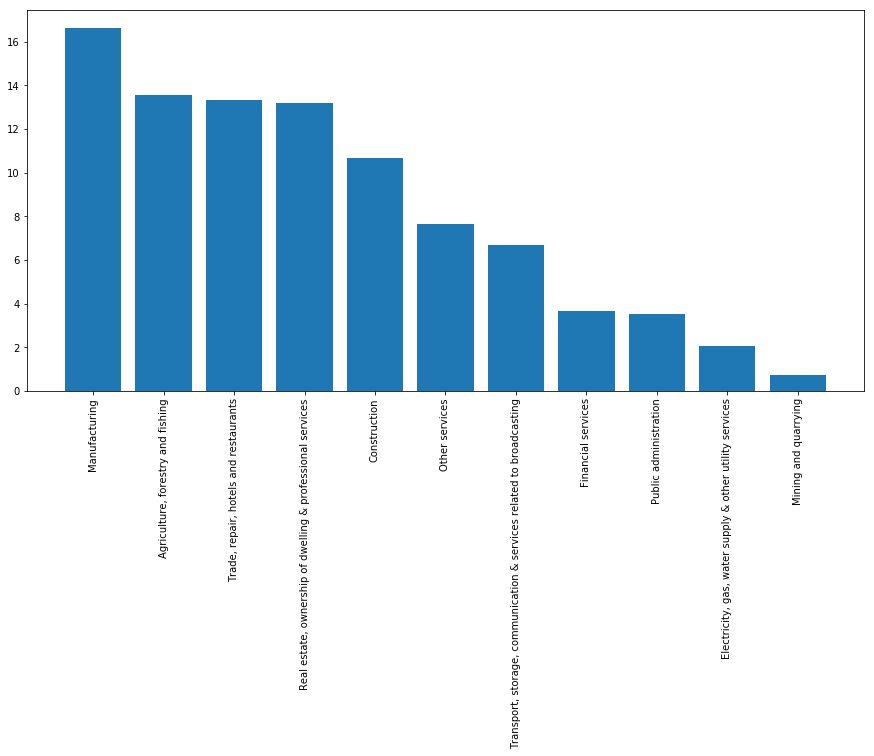

In [109]:
#Plotting the contribution of the sub-sectors as a percentage of the GSDP of C1 category. 
plt.subplots(figsize=(15,7))
cpos1 = np.arange(len(C1_Final))
plt.bar(cpos1, C1_Final['Percentage'])
plt.xticks(cpos1, C1_Final.index, rotation = 'vertical')
plt.figsize=(20,10)

From above dataframe and plot, We can say for the states under C1 i.e.,Kerala, Haryana, Uttarakhand, Goa and Sikkim, sub-sectors like:
--> Manufacturing
--> Agriculture, forestry and fishing
--> Trade, repair, hotels and restaurants
--> Real estate, ownership of dwelling & professional services
--> Construction
--> Other services
--> Transport, storage, communication & services related to broadcasting
have contributed 81.65% in the GDP. 

# Plotting the contribution of the sub-sectors as a percentage of the GSDP and finding the top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP  of C2 category

In [110]:
#Selecting states of category C2 and making a new dataframe for the same
C2_States = C_States[C_States['Category'] == 'C2']
#Setting states as index of the dataframe
C2_States.set_index(C2_States['States'],inplace=True)
#Finally transposing the dataframe after dropping the States column
C2 = C2_States.drop(columns='States').T

In [112]:
C2

States,Maharashtra,TN,Karnataka,Gujrat,AP,Telangana,Punjab,HP,Arunachal
Item,,,,,,,,,
"Agriculture, forestry and fishing",16475655,13064238,11219422,1.377e+07,14819416,7591501,9285716,1514981,686117
Mining and quarrying,5282727,265536,846882,2.11722e+06,1484300,1541853,10354,33385,30842
Manufacturing,33660294,18914794,12953843,2.40875e+07,4672266,6353711,4790341,2543637,26120
"Electricity, gas, water supply & other utility services",4334702,1710379,1425762,3.40998e+06,1151729,716266,911611,767268,113527
Construction,9450211,12216718,6104799,5.52602e+06,4664889,2854024,2202962,808256,147842
"Trade, repair, hotels and restaurants",15839100,12895842,8991658,1.01787e+07,4233400,6494607,4419919,615496,60421
"Transport, storage, communication & services related to broadcasting",9697246,7188320,5097652,4.55591e+06,5076984,3604741,1951809,552234,35203
Financial services,16143324,5598498,4094169,4.60664e+06,1900863,3023729,2057520,362521,25207
"Real estate, ownership of dwelling & professional services",30718051,16830213,24766393,5.1795e+06,4405409,9478839,3142786,1125937,48418


In [113]:
#Summing up contribution of sub-sectors in states of category C1 in a new column 'Total' and 
#skipping the sum of Category columns
C2['Total'] = C2[:-1].sum(axis=1)
C2

States,Maharashtra,TN,Karnataka,Gujrat,AP,Telangana,Punjab,HP,Arunachal,Total
Item,,,,,,,,,,
"Agriculture, forestry and fishing",16475655,13064238,11219422,1.377e+07,14819416,7591501,9285716,1514981,686117,88427015.0
Mining and quarrying,5282727,265536,846882,2.11722e+06,1484300,1541853,10354,33385,30842,11613097.0
Manufacturing,33660294,18914794,12953843,2.40875e+07,4672266,6353711,4790341,2543637,26120,108002544.0
"Electricity, gas, water supply & other utility services",4334702,1710379,1425762,3.40998e+06,1151729,716266,911611,767268,113527,14541227.0
Construction,9450211,12216718,6104799,5.52602e+06,4664889,2854024,2202962,808256,147842,43975718.0
"Trade, repair, hotels and restaurants",15839100,12895842,8991658,1.01787e+07,4233400,6494607,4419919,615496,60421,63729156.0
"Transport, storage, communication & services related to broadcasting",9697246,7188320,5097652,4.55591e+06,5076984,3604741,1951809,552234,35203,37760099.0
Financial services,16143324,5598498,4094169,4.60664e+06,1900863,3023729,2057520,362521,25207,37812475.0
"Real estate, ownership of dwelling & professional services",30718051,16830213,24766393,5.1795e+06,4405409,9478839,3142786,1125937,48418,95695548.0


In [114]:
#Making a list of %Contribution of each subsectors
percC2 = []
for i in range(len(C2['Total'])-1):
    percC2.append(100*(C2['Total'][i] / C2['Total'][-2]))
percC2.append('NaN')

In [115]:
#Adding the list in the dataframe
C2['Percentage'] = percC2

In [116]:
#Creating a new DF with sorted values of percentage and filtering last two rows i.e., Category and GSDP
C2_Final = C2[:-2].sort_values(by='Percentage', ascending = False)

In [117]:
#Creating a new column 'Top 80' and calculating cummulative percentage for each sub sectors
C2_Final['Top 80%'] = 'NaN'
for i in range(len(C2_Final['Percentage'])):
    if i == 0:
        C2_Final['Top 80%'][i] = C2_Final['Percentage'][i]
    else:
        C2_Final['Top 80%'][i] = C2_Final['Top 80%'][i-1] + C2_Final['Percentage'][i]

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [118]:
C2_Final

States,Maharashtra,TN,Karnataka,Gujrat,AP,Telangana,Punjab,HP,Arunachal,Total,Percentage,Top 80%
Item,,,,,,,,,,,,
Manufacturing,33660294,18914794,12953843,2.40875e+07,4672266,6353711,4790341,2543637,26120,108002544.0,17.3406,17.3406
"Real estate, ownership of dwelling & professional services",30718051,16830213,24766393,5.1795e+06,4405409,9478839,3142786,1125937,48418,95695548.0,15.3647,32.7053
"Agriculture, forestry and fishing",16475655,13064238,11219422,1.377e+07,14819416,7591501,9285716,1514981,686117,88427015.0,14.1976,46.903
"Trade, repair, hotels and restaurants",15839100,12895842,8991658,1.01787e+07,4233400,6494607,4419919,615496,60421,63729156.0,10.2322,57.1352
Construction,9450211,12216718,6104799,5.52602e+06,4664889,2854024,2202962,808256,147842,43975718.0,7.06064,64.1958
Other services,10806363,7430115,5308174,3.12341e+06,4215389,4158229,3303041,923164,218728,39486616.0,6.33988,70.5357
Financial services,16143324,5598498,4094169,4.60664e+06,1900863,3023729,2057520,362521,25207,37812475.0,6.07109,76.6068
"Transport, storage, communication & services related to broadcasting",9697246,7188320,5097652,4.55591e+06,5076984,3604741,1951809,552234,35203,37760099.0,6.06268,82.6695
Public administration,5426991,3400800,2232584,2.5762e+06,2200897,1711265,1842730,553974,243867,20189303.0,3.24155,85.911


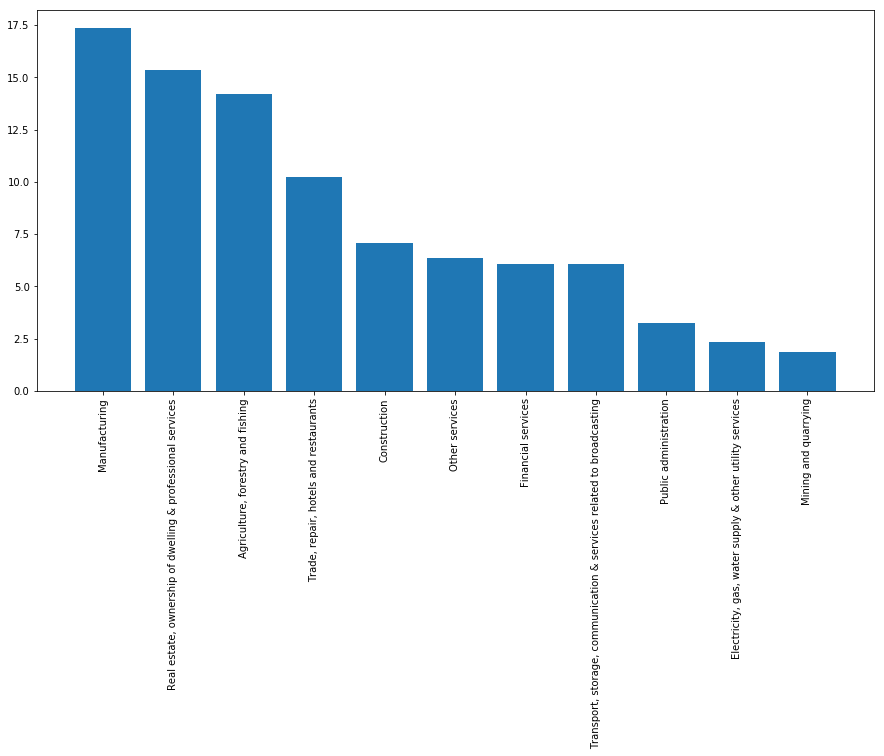

In [174]:
#Plotting the contribution of the sub-sectors as a percentage of the GSDP of C2 category. 
plt.subplots(figsize=(15,7))
cpos2 = np.arange(len(C2_Final))
plt.bar(cpos2, C2_Final['Percentage'])
plt.xticks(cpos2, C2_Final.index, rotation = 'vertical')
plt.figsize=(20,10)

From above dataframe and plot, We can say for the states under C2 i.e.,Maharashtra, Tamil Nadu,	Karnataka, Gujrat, Andhra Pradesh, Telangana, Punjab, Himahcal Pradesh and Arunachal Pradesh, sub-sectors like:
--> Manufacturing
--> Real estate, ownership of dwelling & professional services
--> Agriculture, forestry and fishing
--> Trade, repair, hotels and restaurants
--> Construction
--> Other services
--> Financial services
--> Transport, storage, communication & services related to broadcasting
have contributed 82.66% in the GDP. 

# Plotting the contribution of the sub-sectors as a percentage of the GSDP and finding the top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP  of C3 category

In [120]:
#Selecting states of category C3 and making a new dataframe for the same
C3_States = C_States[C_States['Category'] == 'C3']
#Setting states as index of the dataframe
C3_States.set_index(C3_States['States'],inplace=True)
#Finally transposing the dataframe after dropping the States column
C3 = C3_States.drop(columns='States').T

In [121]:
C3

States,Rajasthan,Odisha,Chhattisgarh,J_and_K,Tripura,Meghalaya,Nagaland,Mizoram
Item,,,,,,,,
"Agriculture, forestry and fishing",15044394,4657383,3948847,1586705,799825,366521,607897,164630
Mining and quarrying,4069385,2787414,2451970,33621,142391,84529,8280,7438
Manufacturing,6552580,5297939,4370593,893207,228625,433213,18346,7283
"Electricity, gas, water supply & other utility services",1122888,564063,1198438,597421,77870,54473,37944,104953
Construction,5353326,2147271,2669855,785503,177899,150256,156072,111249
"Trade, repair, hotels and restaurants",7297290,2703923,1535571,889931,390423,383974,140781,105641
"Transport, storage, communication & services related to broadcasting",3814461,1758042,871770,712552,155956,148189,77521,45217
Financial services,1827413,1018384,739057,374011,86094,64091,60393,21185
"Real estate, ownership of dwelling & professional services",6451997,1994473,2462166,1340082,190704,150409,159651,45035


In [122]:
#Summing up contribution of sub-sectors in states of category C3 in a new column 'Total' and 
#skipping the sum of Category columns
C3['Total'] = C3[:-1].sum(axis=1)
C3

States,Rajasthan,Odisha,Chhattisgarh,J_and_K,Tripura,Meghalaya,Nagaland,Mizoram,Total
Item,,,,,,,,,
"Agriculture, forestry and fishing",15044394,4657383,3948847,1586705,799825,366521,607897,164630,27176202.0
Mining and quarrying,4069385,2787414,2451970,33621,142391,84529,8280,7438,9585028.0
Manufacturing,6552580,5297939,4370593,893207,228625,433213,18346,7283,17801786.0
"Electricity, gas, water supply & other utility services",1122888,564063,1198438,597421,77870,54473,37944,104953,3758050.0
Construction,5353326,2147271,2669855,785503,177899,150256,156072,111249,11551431.0
"Trade, repair, hotels and restaurants",7297290,2703923,1535571,889931,390423,383974,140781,105641,13447534.0
"Transport, storage, communication & services related to broadcasting",3814461,1758042,871770,712552,155956,148189,77521,45217,7583708.0
Financial services,1827413,1018384,739057,374011,86094,64091,60393,21185,4190628.0
"Real estate, ownership of dwelling & professional services",6451997,1994473,2462166,1340082,190704,150409,159651,45035,12794517.0


In [123]:
#Making a list of %Contribution of each subsectors
percC3 = []
for i in range(len(C3['Total'])-1):
    percC3.append(100*(C3['Total'][i] / C3['Total'][-2]))
percC3.append('NaN')

In [124]:
#Adding the list in the dataframe
C3['Percentage'] = percC3

In [125]:
#Creating a new DF with sorted values of percentage and filtering last two rows i.e., Category and GSDP
C3_Final = C3[:-2].sort_values(by='Percentage', ascending = False)

In [126]:
#Creating a new column 'Top 80' and calculating cummulative percentage for each sub sectors
C3_Final['Top 80%'] = 'NaN'
for i in range(len(C3_Final['Percentage'])):
    if i == 0:
        C3_Final['Top 80%'][i] = C3_Final['Percentage'][i]
    else:
        C3_Final['Top 80%'][i] = C3_Final['Top 80%'][i-1] + C3_Final['Percentage'][i]

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [127]:
C3_Final

States,Rajasthan,Odisha,Chhattisgarh,J_and_K,Tripura,Meghalaya,Nagaland,Mizoram,Total,Percentage,Top 80%
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",15044394,4657383,3948847,1586705,799825,366521,607897,164630,27176202.0,20.8339,20.8339
Manufacturing,6552580,5297939,4370593,893207,228625,433213,18346,7283,17801786.0,13.6472,34.4811
"Trade, repair, hotels and restaurants",7297290,2703923,1535571,889931,390423,383974,140781,105641,13447534.0,10.3092,44.7903
"Real estate, ownership of dwelling & professional services",6451997,1994473,2462166,1340082,190704,150409,159651,45035,12794517.0,9.80856,54.5988
Construction,5353326,2147271,2669855,785503,177899,150256,156072,111249,11551431.0,8.85558,63.4544
Mining and quarrying,4069385,2787414,2451970,33621,142391,84529,8280,7438,9585028.0,7.34809,70.8025
Other services,4164287,1879738,1112232,946826,323287,214211,259186,150489,9050256.0,6.93812,77.7406
"Transport, storage, communication & services related to broadcasting",3814461,1758042,871770,712552,155956,148189,77521,45217,7583708.0,5.81384,83.5545
Public administration,2460364,1152119,867982,1349880,338244,239782,295424,179516,6883311.0,5.2769,88.8314


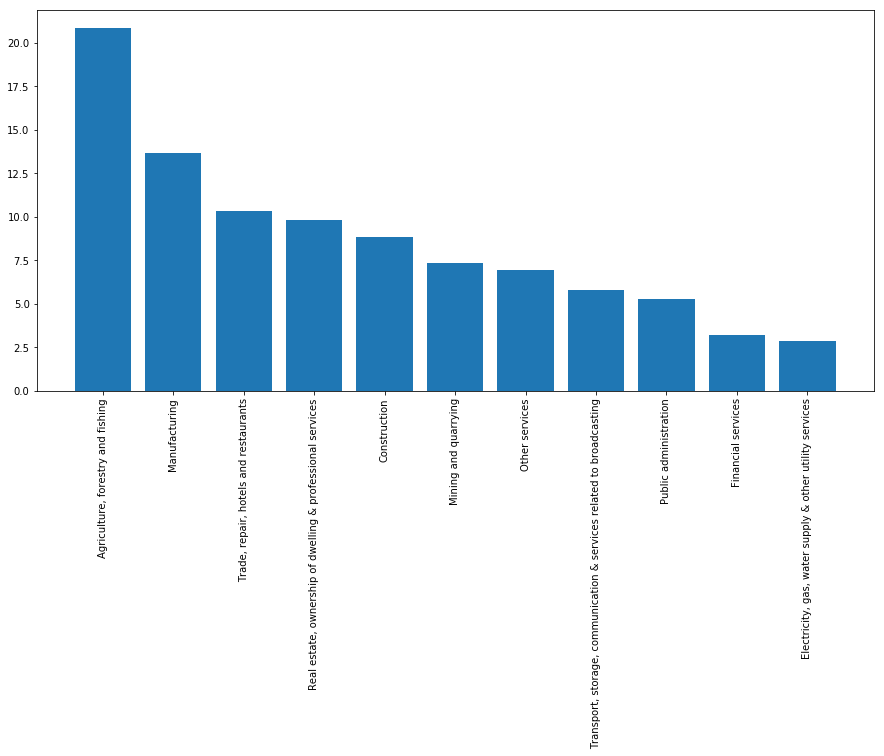

In [128]:
#Plotting the contribution of the sub-sectors as a percentage of the GSDP of C1 category. 
plt.subplots(figsize=(15,7))
cpos3 = np.arange(len(C3_Final))
plt.bar(cpos3, C3_Final['Percentage'])
plt.xticks(cpos3, C3_Final.index, rotation = 'vertical')
plt.figsize=(20,10)

From above dataframe and plot, We can say for the states under C3 i.e.,Rajasthan, Odisha, Chhattisgarh, Jammu and Kashmir, Tripura, Meghalaya, Nagaland, Mizoram, sub-sectors like:
--> Agriculture, forestry and fishing
--> Manufacturing
--> Trade, repair, hotels and restaurants
--> Real estate, ownership of dwelling & professional services
--> Construction
--> Mining and Quarrying
--> Other services
have contributed 77.8% in the GDP. 

# Plotting the contribution of the sub-sectors as a percentage of the GSDP and finding the top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP  of C4 category

In [129]:
#Selecting states of category C4 and making a new dataframe for the same
C4_States = C_States[C_States['Category'] == 'C4']
#Setting states as index of the dataframe
C4_States.set_index(C4_States['States'],inplace=True)
#Finally transposing the dataframe after dropping the States column
C4 = C4_States.drop(columns='States').T

In [130]:
C4

States,UP,MP,Bihar,Jharkhand,Assam,Manipur
Item,,,,,,
"Agriculture, forestry and fishing",25097754,16235647,7951890,3211065,3855548,383140
Mining and quarrying,901501,1618373,68107,2037289,1471149,NaN
Manufacturing,12261649,4368833,2189965,4114148,2002936,49501
"Electricity, gas, water supply & other utility services",2030625,1272905,345168,337489,296587,27490
Construction,11256450,4403151,3449763,1789834,1733568,143182
"Trade, repair, hotels and restaurants",9437243,5357515,7448373,1991359,2987155,262950
"Transport, storage, communication & services related to broadcasting",7404509,2865802,3147173,1470022,1194568,109726
Financial services,3392275,1988794,1178022,551441,543651,30315
"Real estate, ownership of dwelling & professional services",14548185,2660123,3740641,1656784,1412466,159335


In [131]:
#Summing up contribution of sub-sectors in states of category C1 in a new column 'Total' and 
#skipping the sum of Category columns
C4['Total'] = C4[:-1].sum(axis=1)
C4

States,UP,MP,Bihar,Jharkhand,Assam,Manipur,Total
Item,,,,,,,
"Agriculture, forestry and fishing",25097754,16235647,7951890,3211065,3855548,383140,56735044.0
Mining and quarrying,901501,1618373,68107,2037289,1471149,NaN,6096419.0
Manufacturing,12261649,4368833,2189965,4114148,2002936,49501,24987032.0
"Electricity, gas, water supply & other utility services",2030625,1272905,345168,337489,296587,27490,4310264.0
Construction,11256450,4403151,3449763,1789834,1733568,143182,22775948.0
"Trade, repair, hotels and restaurants",9437243,5357515,7448373,1991359,2987155,262950,27484595.0
"Transport, storage, communication & services related to broadcasting",7404509,2865802,3147173,1470022,1194568,109726,16191800.0
Financial services,3392275,1988794,1178022,551441,543651,30315,7684498.0
"Real estate, ownership of dwelling & professional services",14548185,2660123,3740641,1656784,1412466,159335,24177534.0


In [132]:
#Making a list of %Contribution of each subsectors
percC4 = []
for i in range(len(C4['Total'])-1):
    percC4.append(100*(C4['Total'][i] / C4['Total'][-2]))
percC4.append('NaN')

In [133]:
#Adding the list in the dataframe
C4['Percentage'] = percC4

In [134]:
#Creating a new DF with sorted values of percentage and filtering last two rows i.e., Category and GSDP
C4_Final = C4[:-2].sort_values(by='Percentage', ascending = False)

In [135]:
#Creating a new column 'Top 80' and calculating cummulative percentage for each sub sectors
C4_Final['Top 80%'] = 'NaN'
for i in range(len(C4_Final['Percentage'])):
    if i == 0:
        C4_Final['Top 80%'][i] = C4_Final['Percentage'][i]
    else:
        C4_Final['Top 80%'][i] = C4_Final['Top 80%'][i-1] + C4_Final['Percentage'][i]

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [136]:
C4_Final

States,UP,MP,Bihar,Jharkhand,Assam,Manipur,Total,Percentage,Top 80%
Item,,,,,,,,,
"Agriculture, forestry and fishing",25097754,16235647,7951890,3211065,3855548,383140,56735044.0,24.3235,24.3235
"Trade, repair, hotels and restaurants",9437243,5357515,7448373,1991359,2987155,262950,27484595.0,11.7832,36.1067
Manufacturing,12261649,4368833,2189965,4114148,2002936,49501,24987032.0,10.7125,46.8192
"Real estate, ownership of dwelling & professional services",14548185,2660123,3740641,1656784,1412466,159335,24177534.0,10.3654,57.1846
Construction,11256450,4403151,3449763,1789834,1733568,143182,22775948.0,9.76452,66.9491
"Transport, storage, communication & services related to broadcasting",7404509,2865802,3147173,1470022,1194568,109726,16191800.0,6.94176,73.8909
Other services,5034623,2747805,4587589,1375410,1795658,317930,15859015.0,6.79909,80.6899
Public administration,6152124,2497321,2078171,1088325,1373611,297078,13486630.0,5.782,86.4719
Financial services,3392275,1988794,1178022,551441,543651,30315,7684498.0,3.2945,89.7664


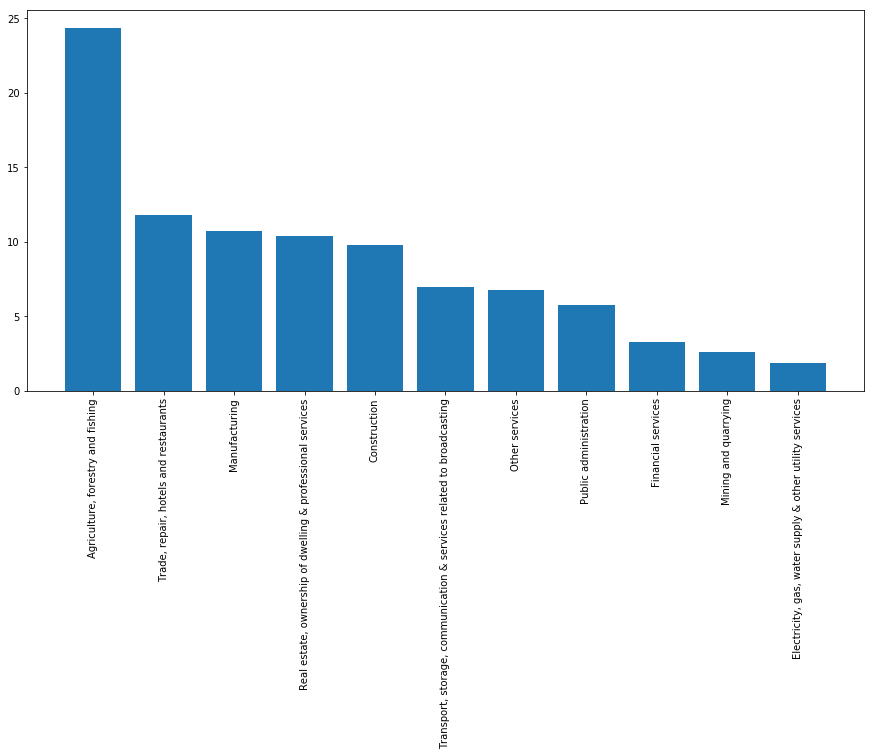

In [137]:
#Plotting the contribution of the sub-sectors as a percentage of the GSDP of C4 category. 
plt.subplots(figsize=(15,7))
cpos4 = np.arange(len(C4_Final))
plt.bar(cpos4, C4_Final['Percentage'])
plt.xticks(cpos4, C4_Final.index, rotation = 'vertical')
plt.figsize=(20,10)

From above dataframe and plot, We can say for the states under C4 i.e.,Uttar Pradesh, Madhya Pradesh, Bihar, Jharkhand,	Assam and Manipur sub-sectors like:
--> Agriculture, forestry and fishing
--> Trade, repair, hotels and restaurants
--> Manufacturing
--> Real estate, ownership of dwelling & professional services
--> Construction
--> Transport, storage, communication & services related to broadcasting
--> Other services
have contributed 80.68% in the GDP. 

# Part II

In [138]:
#Importing dataframe
Drop_outs = pd.read_csv('/Users/shubham/downloads/Drop_outs.csv')
Drop_outs.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [139]:
#Selecting only 2014-15 columns for further analysis
Drop_outs = Drop_outs.loc[:, ['Sl. No.','Level of Education - State','Primary - 2014-2015','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]
Drop_outs.head()

,Sl. No.,Level of Education - State,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,1,A & N Islands,1.21,0.51,1.69,9.87,16.93
1,2,Andhra Pradesh,4.35,6.72,5.20,15.71,NaN
2,3,Arunachal Pradesh,10.89,10.82,6.71,17.11,18.42
3,4,Assam,7.44,15.36,10.51,27.06,NaN
4,5,Bihar,2.09,NaN,4.08,25.90,NaN


In [152]:
#Getting Data-1B and including union territories!

liststates1 = [Gujrat, Goa, HP, Chhattisgarh, Haryana, Sikkim,AP,Bihar,Assam,TN,Rajasthan,Arunachal,Telangana,Punjab,Uttarakhand,Tripura,Maharashtra,UP,MP,Nagaland,Kerala,Karnataka,Meghalaya,Mizoram,Odisha,Jharkhand,Manipur,J_and_K, Delhi, Puducherry, Chandigarh,A_and_N_Islands]
listofstrings1 = ['Gujarat', 'Goa', 'Himachal Pradesh', 'Chhatisgarh', 'Haryana', 'Sikkim','Andhra Pradesh','Bihar','Assam','Tamil Nadu','Rajasthan','Arunachal Pradesh','Telangana','Punjab','Uttrakhand','Tripura','Maharashtra','Uttar Pradesh','Madhya Pradesh','Nagaland','Kerala','Karnataka','Meghalaya','Mizoram','Odisha','Jharkhand','Manipur','Jammu and Kashmir','Delhi','Puducherry','Chandigarh','A & N Islands']

In [153]:
transtates1 = []
for states1 in liststates1:
    transtates1.append(states1.T[2:])

In [154]:
colum1 = Odisha.Item #Taking items for column from any one state
DF1 = pd.concat(transtates1)
DF1.columns =  colum1

DF1 = DF1[DF1.index == '2014-15']

DF1['States'] = listofstrings1

forindex1 = np.arange(1,len(DF1)+1)
DF1.set_index(forindex1, inplace=True)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),States
1,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat
2,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793,Goa
3,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,553974,923164,4133326,9800853,895317,259291,10436879,70840,147330,Himachal Pradesh
4,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860,Chhatisgarh
5,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana


In [155]:
#Selecting only GSDP and States from the dataframe for further analysis
DF1_GDP = DF1.loc[:,['Per Capita GSDP (Rs.)','States']]

In [156]:
#Setting states as index to concate with Drop outs dataframe
DF1_GDP.set_index(DF1_GDP['States'], inplace=True)
DF1_GDP.drop(columns='States', inplace=True)

In [157]:
DF1_GDP.head()

Item,Per Capita GSDP (Rs.)
States,
Gujarat,141263
Goa,271793
Himachal Pradesh,147330
Chhatisgarh,86860
Haryana,164077


In [158]:
Drop_outs.rename(columns={'Level of Education - State' : 'States'}, inplace =True)

In [159]:
Drop_outs.set_index(Drop_outs['States'],inplace=True)

In [160]:
#Merging both the dataframes
DROP_OUT_GDP = pd.concat([Drop_outs,DF1_GDP],join='outer',axis=1, sort=False)

In [161]:
#Sorting values by GSDP

DROP_OUT_GDP.sort_values(by='Per Capita GSDP (Rs.)',inplace=True)
DROP_OUT_GDP

,Sl. No.,States,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,Per Capita GSDP (Rs.)
Bihar,5,Bihar,2.09,NaN,4.08,25.900,NaN,33954
Uttar Pradesh,34,Uttar Pradesh,7.08,8.58,2.70,10.220,2.10,49450
Manipur,22,Manipur,18.00,9.66,4.20,14.380,NaN,58442
Assam,4,Assam,7.44,15.36,10.51,27.060,NaN,60621
Jharkhand,16,Jharkhand,6.41,5.48,8.99,24.000,3.41,62091
Madhya Pradesh,20,Madhya Pradesh,10.14,6.59,9.20,24.770,NaN,62989
Odisha,26,Odisha,2.94,2.86,3.81,29.560,NaN,63122
Jammu and Kashmir,15,Jammu and Kashmir,5.46,6.79,5.44,17.280,12.65,75840
Meghalaya,23,Meghalaya,10.34,9.46,6.52,20.520,NaN,76228
Tripura,33,Tripura,3.58,1.28,1.99,28.420,8.93,77358


In [162]:
#So we can see last 5 rows have NaNs in their GSDP columns. Removimg the for plotting
DROP_OUT_GDP = DROP_OUT_GDP[:-5]

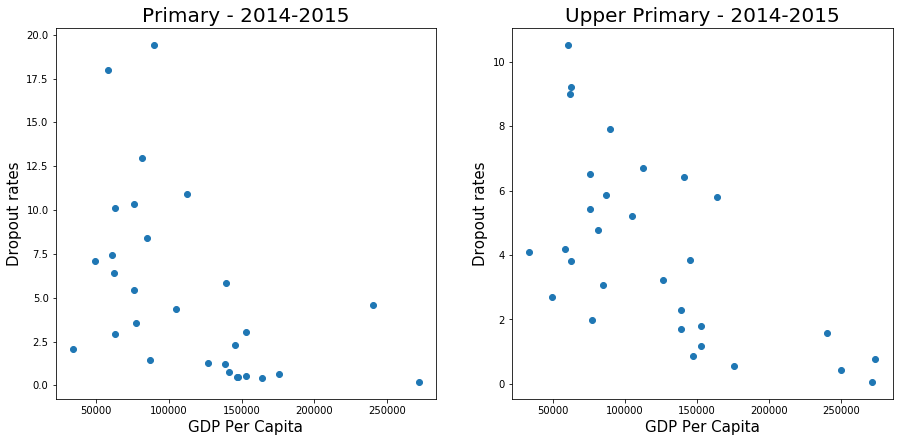

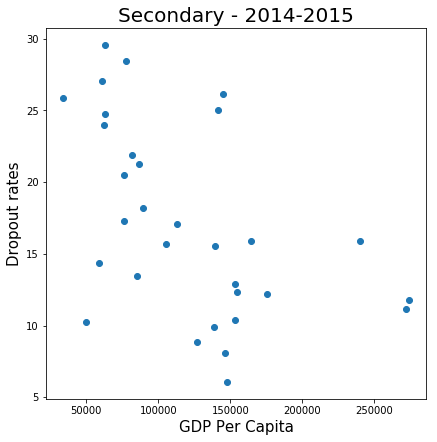

In [182]:
plt.subplots(figsize=(15,15))
# subplot 1
plt.subplot(2, 2, 1)
plt.title("Primary - 2014-2015", fontsize = 20)
plt.xlabel('GDP Per Capita', fontsize = 15)
plt.ylabel('Dropout rates', fontsize = 15)
plt.scatter(DROP_OUT_GDP['Per Capita GSDP (Rs.)'], DROP_OUT_GDP['Primary - 2014-2015'])


# subplot 2 
plt.subplot(2, 2, 2)
plt.title("Upper Primary - 2014-2015", fontsize = 20)
plt.xlabel('GDP Per Capita', fontsize = 15)
plt.ylabel('Dropout rates', fontsize = 15)
plt.scatter(DROP_OUT_GDP['Per Capita GSDP (Rs.)'], DROP_OUT_GDP['Upper Primary - 2014-2015'])


plt.subplots(figsize=(15,15))
# subplot 3
plt.figure(2)
plt.subplot(2, 2, 1)
plt.title("Secondary - 2014-2015", fontsize = 20)
plt.xlabel('GDP Per Capita', fontsize = 15)
plt.ylabel('Dropout rates', fontsize = 15)
plt.scatter(DROP_OUT_GDP['Per Capita GSDP (Rs.)'], DROP_OUT_GDP['Secondary - 2014-2015'])

plt.show()

->For Primary and Secondary, plots are random. 
->We can say that most of the states having low GDP per capita shows higher drop out rates. 
->In Upper Secondary, We can see the decrease in drop out rates as GDP per capita increases. 
->More interestingly, Upper Secondary shows not so big drop out rates even for the states having low GPD per capita